In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name".

In [156]:
data=pd.read_csv('employee.csv',index_col="name")

In [157]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


In [159]:
# describing the data in detail
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [160]:
# to view the null values
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 3. Select rows for specific names Jack Morgan and Josh wills.

In [161]:
data.index

Index(['Allen Smith', 'S Kumar', 'Jack Morgan', 'Ying Chin', 'Dheeraj Patel',
       'Satyam Sharma', 'James Authur', 'Josh Wills', 'Leo Duck'],
      dtype='object', name='name')

In [162]:
data.loc[["Jack Morgan","Josh Wills"],:]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [163]:
data.loc[data["department"].isin(["Sales","Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [164]:
data["performance_score"]>700

name
Allen Smith       True
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel     True
Satyam Sharma    False
James Authur     False
Josh Wills        True
Leo Duck          True
Name: performance_score, dtype: bool

# 6. Display employee who has more than 500 and less than 700 performance score

In [165]:
(data["performance_score"]>500) & (data["performance_score"]<700)

name
Allen Smith      False
S Kumar           True
Jack Morgan       True
Ying Chin         True
Dheeraj Patel    False
Satyam Sharma     True
James Authur     False
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

# 7. Check and handle missing values in the dataset.

In [166]:
# Checking the missing values in the dataset
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

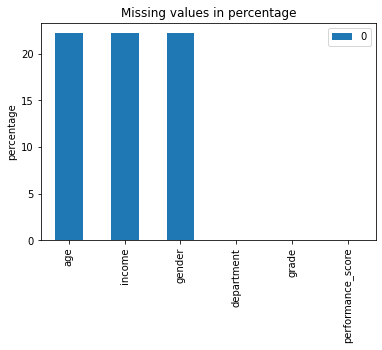

In [167]:
#Check the distribution of missing values
miss_value=pd.DataFrame(data.isna().sum()/len(data) *100)
miss_value.plot(kind="bar",title="Missing values in percentage", ylabel='percentage')
plt.show()

Insight: By looking into the missing value in percentage, we can conclude that
    1. we cannot delete the miising data rows or columns
    2. instead we will go for imputing the whole data set


Skenwness of the numeric data:


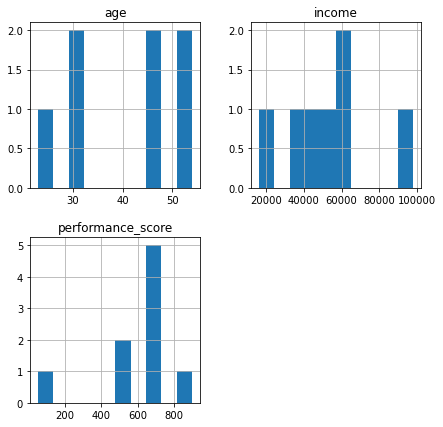

In [168]:
print("Skenwness of the numeric data:")
num_data=data.select_dtypes(exclude="object")
num_data.hist(figsize=(7,7))
plt.show()

Insight:
    since the data is skewed, we will prefer median for imputing null values for continous numeric values
    for categorical missing value, we will go for mode

In [169]:
# replacing null values in the whole data set using sklearn Simple imputer
data.isna().sum()
from sklearn.impute import SimpleImputer # import the class SimpleImputer

#creating function to define the parameter to be used in the SimpleImputer class
def get_parameters(data):
    parameters={}
    for i in data.columns[data.isnull().any()]:
        if data[i].dtype=="int64" or data[i].dtype=="float64":
            strategy="median"
        else:
            strategy="most_frequent"
        missing_values=data[i][data[i].isnull()].values[0]
        parameters[i]={"missing_values":missing_values,"strategy":strategy}
    return parameters     

get_parameters(data)

{'age': {'missing_values': nan, 'strategy': 'median'},
 'income': {'missing_values': nan, 'strategy': 'median'},
 'gender': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [170]:
#loop through each column to transform it

parameters=get_parameters(data)

for col,param in parameters.items():
    missing_values=param["missing_values"]
    strategy=param["strategy"]
    imp=SimpleImputer(missing_values=missing_values,strategy=strategy)
    data[col]=imp.fit_transform(data[[col]])
    
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles

Text(0.5, 1.0, 'Boxplot for Analysing outliers')

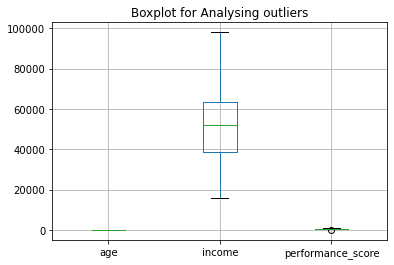

In [171]:
num_data.boxplot()
plt.title("Boxplot for Analysing outliers")

Insight: from above boxplot
    1. we can see that there are outliers present on performance_score

In [172]:
# Handing outlier using Inter quartile range, for column "performance_score"

Q1=np.percentile(data["performance_score"],25,interpolation="midpoint")
Q2=np.percentile(data["performance_score"],50,interpolation="midpoint")
Q3=np.percentile(data["performance_score"],75,interpolation="midpoint")

IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)# lower limit of the outlier
UP_lim=Q3+(1.5*IQR)# Upper limit of the outlier

ind=data["performance_score"]<low_lim
data.loc[ind].index

data.loc[data["performance_score"] <low_lim,"performance_score"] = low_lim

# 9. Check the gender column and do Dummy encoding.

In [177]:
data["gender"]=pd.get_dummies(data["gender"],drop_first=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,0,Operations,G3,723.0
S Kumar,45.0,16000.0,0,Finance,G0,520.0
Jack Morgan,32.0,35000.0,1,Finance,G2,674.0
Ying Chin,45.0,65000.0,0,Sales,G3,556.0
Dheeraj Patel,30.0,42000.0,0,Operations,G2,711.0
Satyam Sharma,45.0,62000.0,0,Sales,G3,649.0
James Authur,54.0,52000.0,0,Operations,G3,323.5
Josh Wills,54.0,52000.0,0,Finance,G3,901.0
Leo Duck,23.0,98000.0,1,Sales,G4,709.0


# 10.Do the standard scaling on the feature performance score

In [194]:
# Converting all categorical values to numerical vale

In [207]:
# applying label encoding on the feature grade
scaler={"G0":1,"G2":2,"G3":3,"G4":4}
data["grade"].replace(scaler,inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,0,Operations,3,723.0
S Kumar,45.0,16000.0,0,Finance,1,520.0
Jack Morgan,32.0,35000.0,1,Finance,2,674.0
Ying Chin,45.0,65000.0,0,Sales,3,556.0
Dheeraj Patel,30.0,42000.0,0,Operations,2,711.0
Satyam Sharma,45.0,62000.0,0,Sales,3,649.0
James Authur,54.0,52000.0,0,Operations,3,323.5
Josh Wills,54.0,52000.0,0,Finance,3,901.0
Leo Duck,23.0,98000.0,1,Sales,4,709.0


In [209]:
#applying dummy encoding on department
data=pd.get_dummies(data)
data

,age,income,gender,grade,performance_score,department_Finance,department_Operations,department_Sales
name,,,,,,,,
Allen Smith,45.0,52000.0,0,3,723.0,0,1,0
S Kumar,45.0,16000.0,0,1,520.0,1,0,0
Jack Morgan,32.0,35000.0,1,2,674.0,1,0,0
Ying Chin,45.0,65000.0,0,3,556.0,0,0,1
Dheeraj Patel,30.0,42000.0,0,2,711.0,0,1,0
Satyam Sharma,45.0,62000.0,0,3,649.0,0,0,1
James Authur,54.0,52000.0,0,3,323.5,0,1,0
Josh Wills,54.0,52000.0,0,3,901.0,1,0,0
Leo Duck,23.0,98000.0,1,4,709.0,0,0,1


In [215]:
# Creating linear Model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x=data.drop("performance_score",axis=1)
y=data["performance_score"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("r2 score:",r2_score(y_test,prediction))

Mean Squared Error: 3694.805555555627
r2 score: 0.7131863179525606


In [223]:
#Applying standard scaling

from sklearn import preprocessing
Standardisation=preprocessing.StandardScaler()
x=data.drop("performance_score",axis=1)
y=data["performance_score"]
x=Standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()


,0,1,2,3,4,5,6
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
mean,1.480297e-16,1.480297e-16,7.401487e-17,1.727014e-16,7.401487e-17,7.401487e-17,7.401487e-17
std,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00
min,-1.818148e+00,-1.725079e+00,-5.345225e-01,-2.041241e+00,-7.071068e-01,-7.071068e-01,-7.071068e-01
25%,-9.309794e-01,-5.018412e-01,-5.345225e-01,-8.164966e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
50%,3.504864e-01,-3.136507e-02,-5.345225e-01,4.082483e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
75%,3.504864e-01,4.391110e-01,-5.345225e-01,4.082483e-01,1.414214e+00,1.414214e+00,1.414214e+00
max,1.237655e+00,2.132825e+00,1.870829e+00,1.632993e+00,1.414214e+00,1.414214e+00,1.414214e+00


In [224]:
# Checking MSE and R2 score value after standard scaling
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("r2 score:",r2_score(y_test,prediction))

Mean Squared Error: 3694.8055555556443
r2 score: 0.7131863179525593


In [ ]:
# Insight:
1. Statndar scaling hsa no impact on the provided data set